In [ ]:
%load_ext autoreload
%autoreload 2

: 

In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import mne

import sleep_utils as utils

: 

In [3]:
sample = mne.io.read_raw_edf("D:\sleep_score\MPSD1 Baseline.edf", preload=True)

Extracting EDF parameters from D:\sleep_score\MPSD1 Baseline.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 43199999  =      0.000 ... 86399.998 secs...


In [4]:
sample

<RawEDF | MPSD1 Baseline.edf, 8 x 43200000 (86400.0 s), ~2.57 GiB, data loaded>

In [5]:
sample.info['sfreq']

500.0

In [6]:
sample.n_times / sample.info['sfreq'] / 10

np.float64(8640.0)

In [7]:
43_200_000 / (500) / 10

8640.0

In [8]:
numeric_sleep_stages = sample["Signal-Sleep"][0][0, np.arange(2500, sample.n_times, 5000)]

In [9]:
numeric_sleep_stages.shape

(8640,)

In [10]:
sleep_stages = utils.extract_sleep_stages(sample)

In [11]:
int_to_stage = {0: "A",
                1: "R",
                2: "S",
                3: "X",
               }

In [12]:
df = pd.Series(sleep_stages).map(int_to_stage).rename("sleep").to_frame().assign(start = lambda df: df.index * 5000).assign(stop = lambda df: (df.index +1 )* 5000)

In [13]:
df.head()

,sleep,start,stop
0,S,0,5000
1,S,5000,10000
2,S,10000,15000
3,S,15000,20000
4,S,20000,25000


In [56]:
samples = df.query('sleep != "X"').groupby("sleep").sample(344).reset_index()

In [60]:
samples.loc[400]

index        3520
sleep           R
start    17600000
stop     17605000
Name: 400, dtype: object

In [71]:
from scipy.fft import fft, fftfreq, fftshift

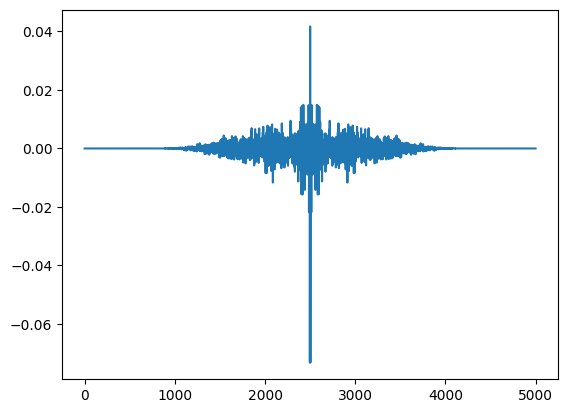

In [72]:
plt.plot(fftshift(fft(sample['EEG'][0][0, df.loc[200, 'start']:df.loc[200, 'stop']])))

array([1.69375143e-05-0.00000000e+00j, 2.27372609e-05+5.71374598e-06j,
       1.79122173e-05-3.02120074e-06j, ...,
       1.75492884e-05-9.19143462e-07j, 1.79122173e-05+3.02120074e-06j,
       2.27372609e-05-5.71374598e-06j])

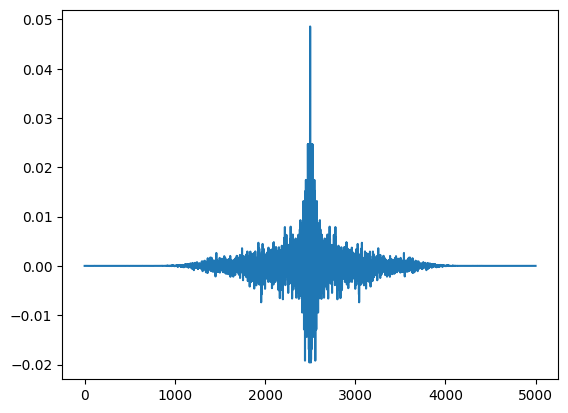

In [75]:
plt.plot(fftshift(fft(sample['EEG'][0][0, df.loc[422, 'start']:df.loc[422, 'stop']])))

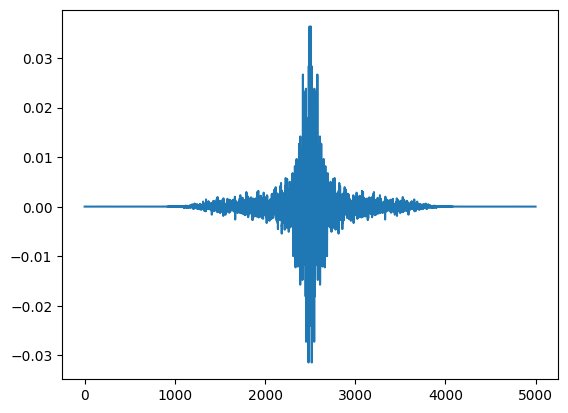

In [74]:
plt.plot(fftshift(fft(sample['EEG'][0][0, df.loc[800, 'start']:df.loc[800, 'stop']])))

In [68]:
pd.Series(scipy.fft.fft(np.digitize(numeric_sleep_stages, bins = [1.5,2.5, 3.5])).value_counts().sort_index())

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [21]:
pd.Series(utils.extract_sleep_stages(sample)).value_counts()

0    4882
2    3262
1     344
3     152
Name: count, dtype: int64

In [22]:
sample.get_data(picks='Signal-Sleep', start=0, stop=5000)[0].mean()

np.float64(3.0298150399589145)

In [23]:
sample.ch_names

['Activity',
 'BattVolt',
 'EEG',
 'EMG',
 'OnTime',
 'SignalStr',
 'Temp',
 'Signal-Sleep']

In [24]:
sample['Signal-Sleep'][0][0, 10000:]

array([3.02981613, 3.02982709, 3.02983805, ..., 3.02978548, 3.02979569,
       3.02980591])

In [ ]:
offset = 200000
sampling_freq = 500
duration = 10

In [ ]:
arr = sample['EEG'][0][0][offset:offset+500*10*3]

In [ ]:
plt.plot(scipy.fft.fft(arr))

In [ ]:
plt.plot(sample['EEG'][0][0][offset:offset+500*10*1])
plt.ylim(-.2/1000, .200/1000)

In [ ]:
plt.plot(sample['EMG'][0][0][offset:offset+500*10*1])

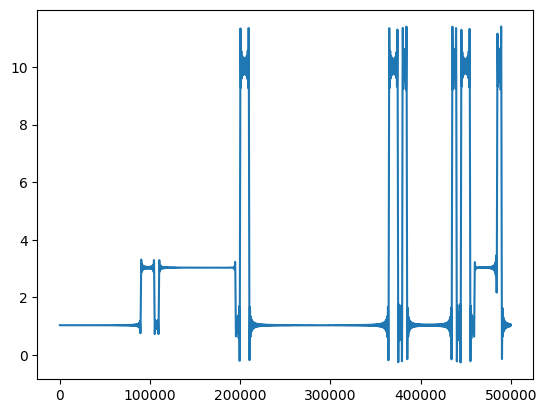

In [25]:
plt.plot(sample['Signal-Sleep'][0][0, 1000000:1500000])

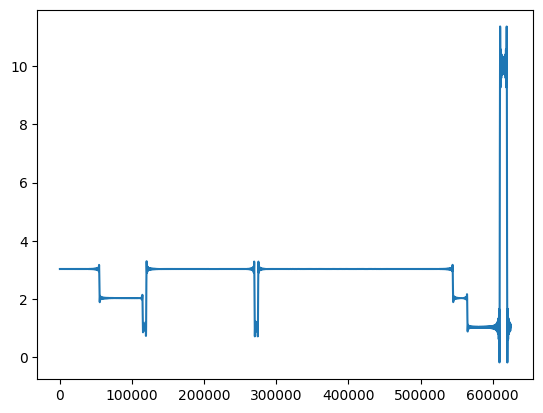

In [26]:
plt.plot(sample['Signal-Sleep'][0][0, :500*10*125])

~ 10 is Artifact
~ 3 is Sleep
~ 2 is REM
~ 1 Awake


In [ ]:
(sample["EEG"][1]).shape

In [ ]:
sample["eeg"][1].shape

In [76]:
import h5py
import numpy as np


In [123]:
f

<Closed HDF5 file>

In [126]:
f = h5py.File("mytestfile.hdf5", "r")



In [125]:
f

<Closed HDF5 file>

In [119]:
f.close()

In [127]:
"mydataset" in f

True

In [133]:
x = f["mydataset"]

In [137]:
np.array(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)